# Starting...

In [ ]:
!pip install factor_analyzer

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer import FactorAnalyzer


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
clear_df = pd.read_csv('/content/drive/MyDrive/junior/correlation 9.6/data_clear.csv')

In [ ]:
clear_df.shape

(976210, 7)

In [ ]:
clear_df.head()

,user_id,funnel_stage,timestamp,profit,os,add_channel,price
0,219687,interest,150000,NaN,android,banner,0.50
1,26717,consideration,150000,NaN,android,organic_traffic,0.00
2,793204,consideration,150000,NaN,android,video,0.75
3,111649,consideration,150000,NaN,android,video,0.75
4,991236,interest,150000,NaN,android,native,2.00


#Feature Engineering

In [ ]:
clear_df['profit'] = clear_df['profit'].fillna(int(0))

In [ ]:
clear_df.shape

(976210, 7)

In [ ]:
clear_df.profit.value_counts()

0.0       971376
1099.0       859
260.0        849
520.0        841
2136.0       826
130.0        733
50.0         726
Name: profit, dtype: int64

In [ ]:
clear_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976210 entries, 0 to 976209
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   user_id       976210 non-null  int64  
 1   funnel_stage  976210 non-null  object 
 2   timestamp     976210 non-null  int64  
 3   profit        976210 non-null  float64
 4   os            976210 non-null  object 
 5   add_channel   976210 non-null  object 
 6   price         976210 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 52.1+ MB


In [ ]:
onh_df = clear_df.copy()

In [ ]:
# применим OneHotEncoder для перобразования категорий os
ohe = OneHotEncoder(sparse_output=False)

In [ ]:
ohe.fit(onh_df[['os']])

OneHotEncoder(sparse_output=False)

In [ ]:
ohe_os = ohe.transform(onh_df[['os']])

In [ ]:
onh_df[ohe.get_feature_names_out()] = ohe_os

In [ ]:
onh_df = onh_df.drop(['os'], axis=1)

In [ ]:
onh_df.head(5)

,user_id,funnel_stage,timestamp,profit,add_channel,price,os_android,os_ios
0,219687,interest,150000,0.0,banner,0.50,1.0,0.0
1,26717,consideration,150000,0.0,organic_traffic,0.00,1.0,0.0
2,793204,consideration,150000,0.0,video,0.75,1.0,0.0
3,111649,consideration,150000,0.0,video,0.75,1.0,0.0
4,991236,interest,150000,0.0,native,2.00,1.0,0.0


In [ ]:
onh_df.shape

(976210, 8)

In [ ]:
# в ручную присовим числовые значения категориональным переменным replace
onh_df = onh_df.replace(['interest', 'consideration','intent','purchase'],[1, 2, 3, 4])

In [ ]:
onh_df.head(5)

,user_id,funnel_stage,timestamp,profit,add_channel,price,os_android,os_ios
0,219687,1,150000,0.0,banner,0.50,1.0,0.0
1,26717,2,150000,0.0,organic_traffic,0.00,1.0,0.0
2,793204,2,150000,0.0,video,0.75,1.0,0.0
3,111649,2,150000,0.0,video,0.75,1.0,0.0
4,991236,1,150000,0.0,native,2.00,1.0,0.0


##Visualization
Матрица корреляции библиотеки Seaborn.

In [ ]:
data_df = onh_df.copy()

In [ ]:
data_df['add_channel'] = pd.factorize(data_df['add_channel'])[0]

In [ ]:
data_df.shape

(976210, 8)

In [ ]:
data_df.head()

,user_id,funnel_stage,timestamp,profit,add_channel,price,os_android,os_ios
0,219687,1,150000,0.0,0,0.50,1.0,0.0
1,26717,2,150000,0.0,1,0.00,1.0,0.0
2,793204,2,150000,0.0,2,0.75,1.0,0.0
3,111649,2,150000,0.0,2,0.75,1.0,0.0
4,991236,1,150000,0.0,3,2.00,1.0,0.0


In [ ]:
data_df.corr(numeric_only = True)

,user_id,funnel_stage,timestamp,profit,add_channel,price,os_android,os_ios
user_id,1.000000,0.044852,0.004898,0.023169,0.162365,0.088011,-0.055087,0.055087
funnel_stage,0.044852,1.000000,0.054792,0.203903,0.007310,0.014314,-0.013056,0.013056
timestamp,0.004898,0.054792,1.000000,0.014341,-0.002320,-0.000443,-0.002101,0.002101
profit,0.023169,0.203903,0.014341,1.000000,0.014872,0.012991,-0.006300,0.006300
add_channel,0.162365,0.007310,-0.002320,0.014872,1.000000,0.797834,-0.231153,0.231153
price,0.088011,0.014314,-0.000443,0.012991,0.797834,1.000000,-0.236228,0.236228
os_android,-0.055087,-0.013056,-0.002101,-0.006300,-0.231153,-0.236228,1.000000,-1.000000
os_ios,0.055087,0.013056,0.002101,0.006300,0.231153,0.236228,-1.000000,1.000000


<Axes: >

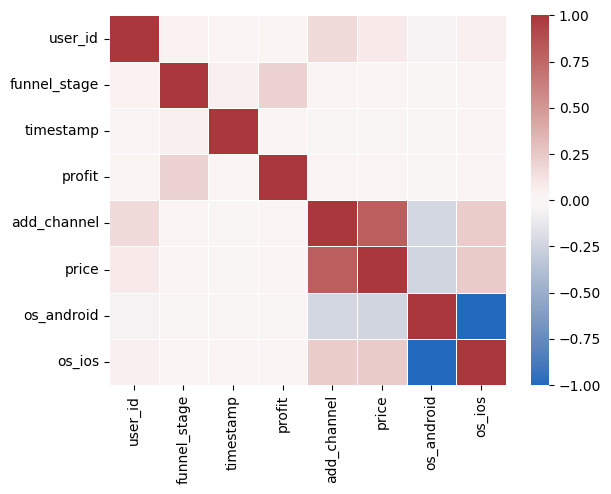

In [ ]:
# печть матрицы корреляции
sns.heatmap(data_df.corr(), cmap='vlag', center=0, linewidths=.5)

In [ ]:
result = st.pearsonr(data_df['user_id'], data_df['price'])
result

PearsonRResult(statistic=0.08801142733553198, pvalue=0.0)

In [ ]:
# Корреляция между  data_df['user_id'], data_df['price'] не значительна, но статистически значима pvalue=0.0

##3
Факторный анализ.Тест Бартлетта.

In [ ]:
data_df = clear_df.copy()

In [ ]:
data_df

,user_id,funnel_stage,timestamp,profit,os,add_channel,price
0,219687,interest,150000,0.0,android,banner,0.50
1,26717,consideration,150000,0.0,android,organic_traffic,0.00
2,793204,consideration,150000,0.0,android,video,0.75
3,111649,consideration,150000,0.0,android,video,0.75
4,991236,interest,150000,0.0,android,native,2.00
...,...,...,...,...,...,...,...
976205,929180,intent,224682,0.0,ios,search,1.50
976206,1034498,intent,225430,0.0,ios,search,1.50
976207,947521,consideration,225482,0.0,android,organic_traffic,0.00
976208,720354,purchase,225495,50.0,android,organic_traffic,0.00


###  Кодирование категориальных признаков с помощью LabelEncoder

In [ ]:
le = preprocessing.LabelEncoder()

In [ ]:
le.fit(data_df['add_channel'])


LabelEncoder()

In [ ]:
data_df['add_channel'] =  le.transform(data_df['add_channel'])

In [ ]:
le.fit(data_df['funnel_stage'])

LabelEncoder()

In [ ]:
data_df['funnel_stage'] =  le.transform(data_df['funnel_stage'])

In [ ]:
data_df['os'] = pd.factorize(data_df['os'])[0]

In [ ]:
data_df.head(-5)

,user_id,funnel_stage,timestamp,profit,os,add_channel,price
0,219687,2,150000,0.0,0,0,0.50
1,26717,0,150000,0.0,0,2,0.00
2,793204,0,150000,0.0,0,6,0.75
3,111649,0,150000,0.0,0,6,0.75
4,991236,2,150000,0.0,0,1,2.00
...,...,...,...,...,...,...,...
976200,104960,3,223361,520.0,1,2,0.00
976201,980989,2,223379,0.0,0,5,1.50
976202,706604,1,223417,0.0,1,2,0.00
976203,501946,1,224125,0.0,0,5,1.50


In [ ]:
data_df.shape

(976210, 7)

### Стандартизация методом StandardScaler

In [ ]:
std_scaler = StandardScaler()

In [ ]:
std_scaler.fit(data_df[['timestamp','user_id','profit','price']])

StandardScaler()

In [ ]:
std_scaled = std_scaler.transform(data_df[['timestamp','user_id','profit','price']])

In [ ]:
data_df[['timestamp','user_id','profit','price']] = std_scaled

In [ ]:
data_df.head()

,user_id,funnel_stage,timestamp,profit,os,add_channel,price
0,-1.075869,2,-1.826566,-0.049611,0,0,-0.824205
1,-1.703829,0,-1.826566,-0.049611,0,2,-1.658962
2,0.790463,0,-1.826566,-0.049611,0,6,-0.406827
3,-1.427445,0,-1.826566,-0.049611,0,6,-0.406827
4,1.434896,2,-1.826566,-0.049611,0,1,1.680064


### bartlet test

In [ ]:
chi_square_value, p_value=calculate_bartlett_sphericity(data_df)
chi_square_value, p_value

(362900.61296594056, 0.0)

In [ ]:
# существют различия в дисперсиях между группами

### Факторный анализ

In [ ]:
fa = FactorAnalyzer(n_factors=3)

In [ ]:
fa.fit(data_df)

FactorAnalyzer(rotation_kwargs={})

In [ ]:
ev, v = fa.get_eigenvalues()

<Axes: >

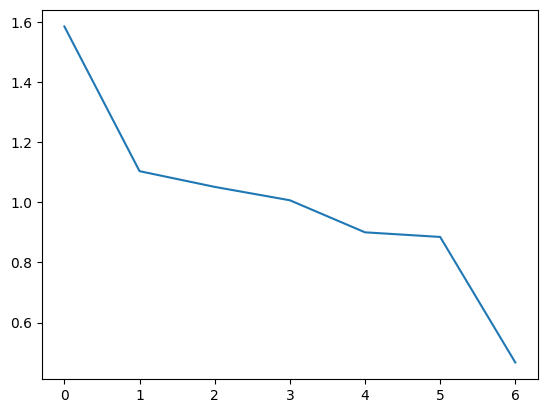

In [ ]:
sns.lineplot(data=ev)

In [ ]:
### Оставим количество факторов равным 3 т.к. значения для последующих факторов меньше 1

In [ ]:
loadings = pd.DataFrame(fa.loadings_, index=data_df.columns, columns=['factor_{x}'.format(x=x+1) for x in range(3)])

In [ ]:
loadings.sort_values(by='factor_3', ascending=False)

,factor_1,factor_2,factor_3
user_id,-0.007085,-0.022032,0.492316
os,0.218326,-0.003643,0.089741
price,0.987493,0.008818,0.061307
profit,0.005098,0.088809,0.038657
timestamp,0.000717,-0.033087,0.010720
funnel_stage,-0.022238,0.999379,-0.024585
add_channel,0.534900,-0.003118,-0.227937


## Conclusion

Корреляция между ценой и идентификатором пользователя низкая. Можно выделить зависимость между типом устройства и рекламным каналом, а также идентификатором пользователя и рекламным каналом (что на мой взгляд странно). Остальные признаки обладают незначительной корреляцией.

факторный анализ. Фактор 1 указывает на обратную зависимость цены от этапа воронки продаж, там, где price меньше этап воронки ниже. Также интересная зависимость фактор 2, между этапом воронки продаж и моментом события.


In [3]:
!jupyter nbconvert --to html /content/factor_analysis.ipynb

[NbConvertApp] Converting notebook /content/factor_analysis.ipynb to html
[NbConvertApp] Writing 763249 bytes to /content/factor_analysis.html
